Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [36]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def loadFile(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [37]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

enrollments = loadFile('enrollments.csv')
daily_engagement = loadFile('daily_engagement.csv')
project_submissions = loadFile('project_submissions.csv')

print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [38]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['account_key'] = parse_maybe_int(enrollment['account_key'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': 448,
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [39]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['acct'] = parse_maybe_int(engagement_record['acct'])
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': 0,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [40]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['account_key'] = parse_maybe_int(submission['account_key'])
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': 256,
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [41]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = len(set([x['account_key'] for x in enrollments]))

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = len(set([x['acct'] for x in daily_engagement]))

submission_num_rows = len(project_submissions)
submission_num_unique_students = len(set([x['account_key'] for x in project_submissions]))

print enrollment_num_unique_students
print engagement_num_unique_students
print submission_num_unique_students

1302
1237
743


## Problems in the Data

In [42]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for x in daily_engagement:
    x['account_key'] = x['acct']
    del(x['acct'])

print daily_engagement[0]['account_key']

0


## Missing Engagement Records

In [43]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

missing = list(set([x['account_key'] for x in enrollments]) - set([x['account_key'] for x in daily_engagement]))
"""
for x in missing:
    if enrollments[x]['join_date'] == enrollments[x]['cancel_date']:
        print enrollments[x]
"""
for p in [enrollments[x] for x in missing if enrollments[x]['join_date'] == enrollments[x]['cancel_date']]: print p

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 5, 0, 0), u'account_key': 749, u'cancel_date': datetime.datetime(2015, 3, 5, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 7, 17, 0, 0), u'account_key': 968, u'cancel_date': datetime.datetime(2015, 7, 17, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 7, 0, 0), u'account_key': 1222, u'cancel_date': datetime.datetime(2015, 4, 7, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 5, 29, 0, 0), u'account_key': 902, u'cancel_date': datetime.datetime(2015, 5, 29, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 5, 0, 0), u'account_k

## Checking for More Problem Records

In [44]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
"""
for x in missing:
    if enrollments[x]['is_udacity']:
        print enrollments[x]
"""        
for p in [enrollments[x] for x in missing if enrollments[x]['is_udacity']]: print p

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 7, 0, 0), u'account_key': 818, u'cancel_date': datetime.datetime(2015, 1, 12, 0, 0), u'days_to_cancel': 5}


## Tracking Down the Remaining Problems

In [45]:
# Create a set of the account keys for all Udacity test accounts
"""
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)
"""
udacity_test_accounts = set(x['account_key'] for x in enrollments if x['is_udacity'])

In [46]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
"""
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data
"""

"\ndef remove_udacity_accounts(data):\n    non_udacity_data = []\n    for data_point in data:\n        if data_point['account_key'] not in udacity_test_accounts:\n            non_udacity_data.append(data_point)\n    return non_udacity_data\n"

In [47]:
# Remove Udacity test accounts from all three tables
"""
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)
"""

non_udacity_enrollments = [x for x in enrollments if x['account_key'] not in udacity_test_accounts]
non_udacity_engagement = [x for x in daily_engagement if x['account_key'] not in udacity_test_accounts]
non_udacity_submissions = [x for x in project_submissions if x['account_key'] not in udacity_test_accounts]

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [48]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

#good_students = set([x['account_key'] for x in non_udacity_enrollments if not x['is_canceled'] or x['days_to_cancel'] > 7])

#got same 995 lines but join_date is not up-to-date
"""
paid_students = dict(zip([k for k in good_student], [v['join_date'] for v in non_udacity_enrollments 
                          if v['account_key'] in good_student]
"""

"""
i=0
for enrolment in non_udacity_enrollments:
    if not enrolment['is_canceled'] or enrolment['days_to_cancel'] > 7:
        i+=1
print i --> 1215

i=0
for enrolment in non_udacity_enrollments:
    if enrolment['account_key'] in good_students:
        i+=1
print i --> 1293 perhaps keys in non_udacity_enrollments are not unique so we can't check with good_students
"""

paid_students = {}
for enrolment in non_udacity_enrollments:
    if not enrolment['is_canceled'] or enrolment['days_to_cancel'] > 7:
    #if enrolment['account_key'] in good_students:  #not good
        if not enrolment['is_canceled'] or enrolment['days_to_cancel'] > 7:
            account_key = enrolment['account_key']
            enrolment_date = enrolment['join_date']
            #fetch only most recent activity
            if account_key not in paid_students.keys() or enrolment_date > paid_students[account_key]:
                paid_students[account_key] = enrolment_date

print len(paid_students)

995


## Getting Data from First Week

In [49]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    #return time_delta.days < 7
    return time_delta.days < 7 and time_delta.days >= 0

In [50]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_enrollments = [x for x in non_udacity_enrollments if x['account_key'] in paid_students.keys()]
paid_engagement = [x for x in non_udacity_engagement if x['account_key'] in paid_students.keys()]
paid_submissions = [x for x in non_udacity_submissions if x['account_key'] in paid_students.keys()]

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

paid_engagement_in_first_week = [x for x in paid_engagement
                                 if within_one_week(paid_students[x['account_key']], x['utc_date'])]

print(len(paid_engagement_in_first_week))

1293
134549
3618
6919


## Exploring Student Engagement

In [51]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [52]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
"""
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
"""

def totalDict(keyCol):
    total_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[keyCol]
        total_by_account[account_key] = total
    return total_by_account

total_minutes_by_account = totalDict('total_minutes_visited')

In [117]:
import numpy as np

def describeData(lstVal):
    print 'Mean:', np.mean(lstVal)
    print 'Standard deviation:', np.std(lstVal)
    print 'Minimum:', np.min(lstVal)
    print 'Maximum:', np.max(lstVal)

# Summarize the data about minutes spent in the classroom
describeData(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [118]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

#Done

## Lessons Completed in First Week

In [119]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = totalDict('lessons_completed')
describeData(total_lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [120]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def totalDayDict(keyCol):
    total_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total = 0
        dayList = []
        for engagement_record in engagement_for_student:
            if engagement_record not in dayList and engagement_record[keyCol] > 0:
                total += 1
                dayList.append(engagement_record['utc_date'])
        total_by_account[account_key] = total
    return total_by_account

total_course_visited_by_account = totalDayDict('num_courses_visited')
describeData(total_course_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [121]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

#using set eleminates duplicate
pass_subway_project = set([x['account_key'] for x in paid_submissions 
                           if x['lesson_key'] in subway_project_lesson_keys 
                           and (x['assigned_rating'] == 'PASSED' or x['assigned_rating'] == 'DISTINCTION')])

passing_engagement = [x for x in paid_engagement_in_first_week if x['account_key'] in pass_subway_project]
non_passing_engagement = [x for x in paid_engagement_in_first_week if x['account_key'] not in pass_subway_project]

""" not exclude duplicate
passing_engagement = [] #-> 4562
non_passing_engagement = [] #-> 5912

for x in paid_engagement_in_first_week:
    for y in paid_submissions:
        if y['account_key'] == x['account_key'] and y['lesson_key'] in subway_project_lesson_keys:
            if y['assigned_rating'] == 'PASSED' or y['assigned_rating'] == 'DISTINCTION':
                passing_engagement.append(x['account_key'])
            else:
                non_passing_engagement.append(x['account_key'])
"""

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [122]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

def totalEngagementDict(keyCol, engagement):
    totalDict = {}
    for eng in engagement:
        if eng['account_key'] in totalDict.keys():
            totalDict[eng['account_key']] += eng[keyCol]
        else:
            totalDict[eng['account_key']] = eng[keyCol]
            
    return totalDict

def totalEngagementDayDict(keyCol, engagement):
    totalDict = {}
    for eng in engagement:
        if eng['account_key'] in totalDict.keys():
            if eng[keyCol] not in totalDict[eng['account_key']]:
                totalDict[eng['account_key']].append(eng[keyCol])
        else:
            totalDict[eng['account_key']] = [eng[keyCol]]
            
    return dict(zip(totalDict.keys(), [np.count_nonzero(totalDict[k]) for k in totalDict.keys()]))

print 'total_minutes_visited'
print describeData(totalEngagementDict('total_minutes_visited', passing_engagement).values())
print describeData(totalEngagementDict('total_minutes_visited', non_passing_engagement).values())

print 'lessons_completed'
print describeData(totalEngagementDict('lessons_completed', passing_engagement).values())
print describeData(totalEngagementDict('lessons_completed', non_passing_engagement).values())

print 'Days'
print describeData(totalEngagementDayDict('utc_date', passing_engagement).values())
print describeData(totalEngagementDayDict('utc_date', non_passing_engagement).values())


total_minutes_visited
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
None
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
None
lessons_completed
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
None
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
None
Days
Mean: 6.99690880989
Standard deviation: 0.0555124729399
Minimum: 6
Maximum: 7
None
Mean: 6.87356321839
Standard deviation: 0.583382875423
Minimum: 1
Maximum: 7
None


## Making Histograms

Mean: 6.99690880989
Standard deviation: 0.0555124729399
Minimum: 6
Maximum: 7
None
Mean: 6.87356321839
Standard deviation: 0.583382875423
Minimum: 1
Maximum: 7
None


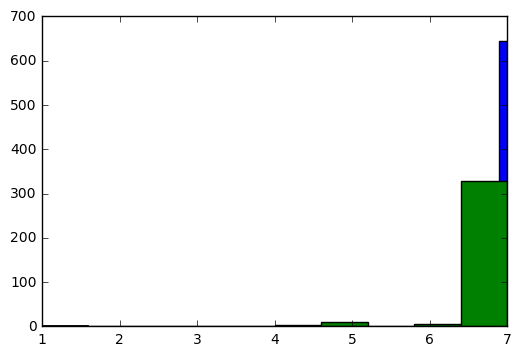

In [126]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt

def describeDataHis(lstVal):
    print 'Mean:', np.mean(lstVal)
    print 'Standard deviation:', np.std(lstVal)
    print 'Minimum:', np.min(lstVal)
    print 'Maximum:', np.max(lstVal)

    plt.hist(lstVal)

print describeDataHis(totalEngagementDayDict('utc_date', passing_engagement).values())
print describeDataHis(totalEngagementDayDict('utc_date', non_passing_engagement).values())

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.